# Часть I: О теореме Байеса

## 1. Прокурор

Ошибка прокурора заключается в том, что он считает достаточным учесть вероятность, что у человека редкая группа крови (которой обладает 1% населения города). При этом он не учитывает тот факт, что 1% процент от населения города – это 0,1 * 1000000 = 10000 человек.

В качестве правильной вероятности необходимо было рассматривать оценку условной вероятности, что человек является убийцей при условии, что у него редкая группа крови.


## 2. Адвокат

Ошибка адвоката заключается предложение исключить данную информацию из материалов дела. Данное предложение является ошибкой, потому что наличие у подозреваемого редкой крови увеличивает его вероятность быть виновным, т.к. редкой кровью обладают лишь 10000 жителей города, а не миллион, т.е. число сокращается в 100 раз.


## 3. Тест на болезнь

Введём обозначения:

* d - человек болен (соответственно, $ \overline{d} $ - не болен)
* t - тест положительный (соответственно, $ \overline{t} $ - тест отрицательный)

А также рассмотрим следующие условные вероятности по теореме Байеса:

$$ 
p(d|t)=\frac{p(t|d)p(d)}{p(t)}=\frac{p(t|d)p(d)}{p(t|d)p(d) + p(t|\overline{d})p(\overline{d})}
$$

$$
p(d|\overline{t})=\frac{p(\overline{t}|d)p(d)}{p(\overline{t})}=\frac{p(\overline{t}|d)p(d)}{p(\overline{t}|d)p(d) + p(\overline{t}|\overline{d})p(\overline{d})}
$$

С учётом начальных условий получаем:
$$ 
p(d|t)=\frac{0.95 \cdot 0.01}{0.95 \cdot 0.01 + 0.05 \cdot 0.99} \approx 0.16
$$

$$
p(d|\overline{t})=\frac{0.05 \cdot 0.01}{0.05 \cdot 0.01 + 0.95 \cdot 0.99} \approx 0.00053
$$

Теперь рассмотрим ложноположительную $ p(t|\overline{d}) $ и ложноотрицательную $ p(\overline{t}|d) $ ошибки с учётом максимальной вероятности в $ 0.05 $ в обоих случаях. Рассмотрим по очереди уменьшение ошибок на $ 0.01 $.

1. Уменьшим $ p(t|\overline{d}) $

$$ 
p(t|\overline{d}) = 0.04 => p(\overline{t}|\overline{d}) = 1 - p(t|\overline{d}) = 0.96
$$

Тогда получим, что:
$$
p(d|t) \approx 0.19348
$$
$$
p(d|\overline{t}) \approx 0.00053
$$

Соответственно, $ p(d|t) $ увеличилось на $ 0.03348 $, тогда как $ p(d|\overline{t}) $ уменьшилось на $ 0 $ (с учётом $ 5 $-го знака).

2. Уменьшим $ p(\overline{t}|d) $

$$
p(\overline{t}|d) = 0.04 => p(t|d) = 1 - p(\overline{t}|d) = 0.96
$$

Тогда получим, что:
$$
p(d|t) \approx 0.16244
$$
$$
p(d|\overline{t}) \approx 0.00043
$$

Соответственно, $ p(d|t) $ увеличилось на $ 0.00244 $, тогда как $ p(d|\overline{t}) $ уменьшилось на $ 0.0001 $.

## Итог

Таким образом, учитывая уровень прироста $ p(d|t) $ и уровень уменьшение $ p(d|\overline{t}) $, врачам лучше сосредоточиться на уменьшении вероятности ложноположительной ошибки, т.е. $ p(t|\overline{d}) $.

# Часть II: О линейной регрессии

## 1. Скачать и подготовить данные

In [ ]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
FILENAME_COVID = 'owid-covid-data.csv'
DATE_FROM = datetime.datetime(year=2020, month=3, day=3)
DATE_TO = datetime.datetime(year=2020, month=4, day=21)

df = pd.read_csv(FILENAME_COVID, index_col=None, header=0)

df = df[df['location'] == 'Russia']
df = df[['date', 'new_cases', 'total_cases']]

df['date'] = pd.to_datetime(df['date'])
df['new_cases'] = df['new_cases'].replace({0: 1})

df_50 = df[(df['date'] >= DATE_FROM) & (df['date'] <= DATE_TO)]

df.reset_index(drop=True, inplace=True)
df_50.reset_index(drop=True, inplace=True)  # 50 дней

df_50.describe()

,new_cases,total_cases
count,50.000000,50.000000
mean,1055.300000,8202.460000
std,1610.954556,13530.534343
min,1.000000,3.000000
25%,18.750000,69.750000
50%,212.000000,1150.000000
75%,1388.000000,9766.250000
max,6060.000000,52763.000000


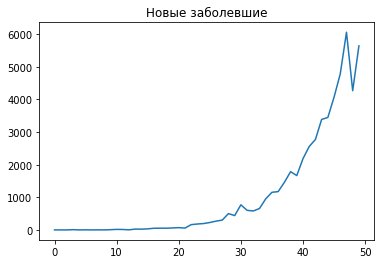

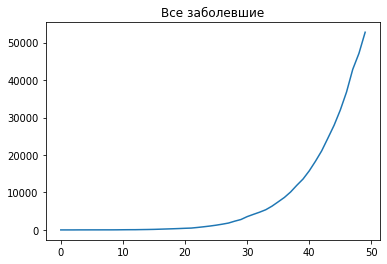

In [ ]:
plt.plot(df_50.index, df_50['new_cases'])
plt.title('Новые заболевшие')
plt.show()

plt.plot(df_50.index, df_50['total_cases'])
plt.title('Все заболевшие')
plt.show()

## 2. Постройте графики целевых переменных

### 2a Обучите модель с экспоненциальным ростом числа заболевших

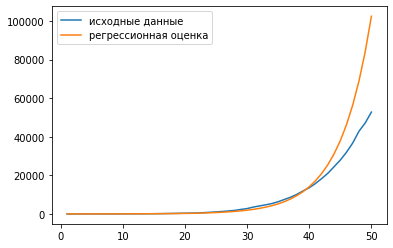

In [ ]:
x = np.array([i + 1 for i in range(df_50.shape[0])]).reshape(-1, 1)
y = np.log(df_50['total_cases'])

model = LinearRegression()
model.fit(x, y)

predict_y = lambda x: np.exp(model.coef_[0] * x + model.intercept_)

plt.plot(x, df_50['total_cases'], label='исходные данные')
plt.plot(x, [predict_y(i) for i in x.ravel()], label='регрессионная оценка')
plt.legend()
plt.show()